In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Importing required header libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Importing Datasets, Sampling and Train Test Split

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Machine Learning Stuff/Data/diabetes.csv")

In [6]:
df.shape

(768, 9)

In [7]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [8]:
X = df.drop('Outcome', axis=1)
Y = df['Outcome']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=1, stratify=Y)

# Binarisation of data

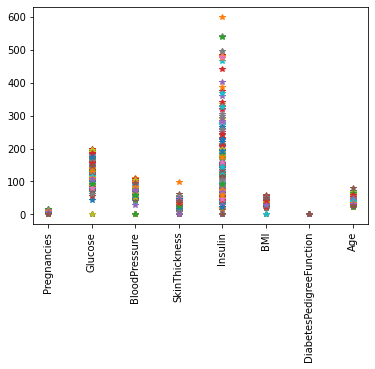

In [10]:
plt.plot(X_train.transpose(), "*")
plt.xticks(rotation=90)
plt.show()

In [11]:
X_binarized_train = X_train.apply(pd.cut, bins=2, labels=[0,1])
X_binarized_test = X_test.apply(pd.cut, bins=2, labels=[0,1])

# MP Neuron training

In [12]:
X_binarized_train = X_binarized_train.values
X_binarized_test = X_binarized_test.values

In [13]:
class mpNeuron:
  def __init__(self):
    self.b = None

  def model(self, x):
    return 1 if (np.sum(x)>=self.b) else 0
  
  def predict(self, X):
    predictions = []
    for x in X:
      predictions.append(self.model(x))
    return (np.array(predictions))
  
  def fit(self, X, Y):
    accuracy = {}
    max_accuracy = 0
    for b in range(X.shape[1]+1):
      self.b = b
      y_pred = self.predict(X)
      accuracy[self.b] = accuracy_score(y_pred, Y)
      if accuracy[self.b] > max_accuracy:
        max_accuracy = accuracy[self.b]
        checkb = self.b
    
    print(max_accuracy)
    self.b = checkb
    print("Accuracy Score: ", accuracy[self.b])
    print("Accuracy Index: ", self.b)

In [14]:
mpneuron = mpNeuron()
mpneuron.fit(X_binarized_train, y_train)

0.703125
Accuracy Score:  0.703125
Accuracy Index:  4


In [15]:
predictions = mpneuron.predict(X_binarized_test)
print(accuracy_score(y_test, predictions))

0.6666666666666666


# Perceptron Learning Algorithm

In [16]:
X_train = X_train.values
X_test = X_test.values

In [17]:
class perceptronAlgorithm:
  def __init__(self):
    self.b = None
    self.w = None
  
  def model(self, x):
    return 1 if (np.dot(self.w,x)>=self.b) else 0
  
  def predict(self, X):
    predictions = []
    for x in X:
      predictions.append(self.model(x))
    return (np.array(predictions))
  
  def fit(self, X, Y, epochs=1, lr=1):
    accuracy = {}
    max_accuracy = 0
    pos = 0
    self.w = np.ones(X.shape[1])
    self.b = 0

    for epoch in range(epochs):
      for x,y in zip(X,Y):
        y_pred = self.model(x)
        if y == 0 and y_pred == 1:
          self.w = self.w - lr*x
          self.b = self.b + lr*1
        if y == 1 and y_pred == 0:
          self.w = self.w + lr*x
          self.b = self.b - lr*1
      accuracy[epoch] = accuracy_score(self.predict(X), Y)
      if accuracy[epoch] > max_accuracy:
        pos = epoch
        max_accuracy = accuracy[epoch]
        checkb = self.b
        checkw = self.w
    print(max_accuracy)
    self.b = checkb
    self.w = checkw
    print("Accuracy Score: ", accuracy[pos])

In [18]:
percepAlgo = perceptronAlgorithm()
percepAlgo.fit(X_train, y_train, epochs=1000, lr=0.1)

0.6892361111111112
Accuracy Score:  0.6892361111111112


In [19]:
prediction = percepAlgo.predict(X_test)
accuracy_score(prediction, y_test)

0.671875